In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [41]:
df = pd.read_csv("crypto_data.csv")
df.head()

,CryptID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptID          1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [43]:
df.IsTrading.value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [44]:
df.Algorithm.value_counts()

Scrypt                 424
X11                    197
SHA-256                131
X13                     57
PoS                     44
                      ... 
PHI2                     1
CryptoNight-lite         1
SHA-256 + Hive           1
Semux BFT consensus      1
Green Protocol           1
Name: Algorithm, Length: 95, dtype: int64

In [45]:
df.ProofType.value_counts()

PoW                                      535
PoW/PoS                                  468
PoS                                      185
DPoS                                      21
PoS/PoW                                    5
PoC                                        3
PoA                                        3
PoW/PoS                                    2
LPoS                                       2
 PoW/PoS                                   1
PoS/LPoS                                   1
PoW/PoW                                    1
TPoS                                       1
PoW and PoS                                1
DPoW                                       1
PoS/PoW/PoT                                1
PoW + Hive                                 1
Proof of Trust                             1
DPoI                                       1
DPOS                                       1
DPoS/LPoS                                  1
Pos                                        1
POS / MN  

In [46]:
df.describe()

,TotalCoinsMined
count,7.440000e+02
mean,3.883104e+09
std,3.867264e+10
min,-5.917978e+09
25%,6.322164e+05
50%,1.340427e+07
75%,9.399895e+07
max,9.899890e+11


In [47]:
pd.to_numeric(df.TotalCoinSupply)

ValueError: Unable to parse string "20 000 000" at position 427

In [48]:
df_sub = df.copy()

df_sub = df_sub.loc[df_sub.IsTrading ==True].reset_index(drop=True)

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptID          1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [49]:
df_sub = df_sub.dropna(how="any").reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptID          685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 32.9+ KB


In [50]:
df_sub.sort_values(by="TotalCoinsMined")

,CryptID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
667,FIII,Fiii,SHA3-256,True,DPoC,-5.917978e+09,5000000000
408,LBTC,LiteBitcoin,Scrypt,True,PoW,0.000000e+00,1000000000
101,RIPO,RipOffCoin,Scrypt,True,PoW,0.000000e+00,12000000
291,BASH,LuckChain,Scrypt,True,PoW/PoS,0.000000e+00,1000000000
287,CSH,CashOut,SHA-256,True,PoW,0.000000e+00,100000000
...,...,...,...,...,...,...,...
571,QWC,Qwertycoin,CryptoNight Heavy,True,PoW,9.955311e+10,1.8447E+11
407,NYC,NewYorkCoin,Scrypt,True,PoW,1.430070e+11,0
395,GCN,gCn Coin,Scrypt,True,PoW,1.630550e+11,2E+11
136,BCN,ByteCoin,CryptoNight,True,PoW,1.840670e+11,1.84467E+11


In [51]:
mask = df_sub.TotalCoinsMined > 0
df_sub = df_sub.loc[mask].reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptID          532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 25.6+ KB


In [52]:
df_sub["TotalCoinSupply"] = pd.to_numeric(df_sub.TotalCoinSupply)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CryptID          532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    float64
dtypes: bool(1), float64(2), object(4)
memory usage: 25.6+ KB


In [53]:
[x for x in df_sub.ProofType.value_counts().index]

['PoW',
 'PoW/PoS',
 'PoS',
 'DPoS',
 'PoC',
 'PoS/PoW',
 'POBh',
 'PoW/PoW',
 'TPoS',
 'PoW and PoS',
 'Proof of Authority',
 'PoS/PoW/PoT',
 'PoW + Hive',
 'Proof of Trust',
 'LPoS',
 'dPoW/PoW',
 'PoW/PoS ',
 'Pos',
 'PoST',
 'PoW/nPoS',
 'DPOS',
 'PoA',
 'Zero-Knowledge Proof',
 'HPoW',
 'PoS/LPoS']

In [54]:
df_sub.loc[df_sub.ProofType == "PoW/PoS", "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == "Pos", "ProofType"] = "PoS"
df_sub.loc[df_sub.ProofType == "Proof of Authority", "ProofType"] = "PoA"
df_sub.loc[df_sub.ProofType == "PoW and PoS", "ProofType"] = "Pow/PoS"
df_sub.loc[df_sub.ProofType == "Proof of Trust", "ProofType"] = "PoT"

In [55]:
[x for x in df_sub.ProofType.value_counts().index]

['PoW',
 'PoW/PoS',
 'PoS',
 'DPoS',
 'PoC',
 'PoA',
 'PoS/PoW',
 'PoW + Hive',
 'POBh',
 'PoT',
 'LPoS',
 'PoW/PoW',
 'TPoS',
 'PoS/PoW/PoT',
 'Pow/PoS',
 'dPoW/PoW',
 'PoW/PoS ',
 'PoST',
 'PoW/nPoS',
 'DPOS',
 'Zero-Knowledge Proof',
 'HPoW',
 'PoS/LPoS']

In [56]:
coin_sub = df_sub.CoinName
df_sub.drop(["Unnamed: 0", "CoinName", "IsTrading"], axis=1, inplace=True)
df_sub.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [57]:
df_sub2 = pd.get_dummies(df_sub)
df_sub2.head()

,IsTrading,TotalCoinsMined,TotalCoinSupply,CryptID_1337,CryptID_1CR,CryptID_404,CryptID_42,CryptID_8BIT,CryptID_AAC,CryptID_ABJ,...,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pow/PoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,True,4.199995e+01,4.200000e+01,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,True,1.055185e+09,5.320000e+08,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,True,2.927942e+10,3.141590e+11,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,True,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,True,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
scaler = scaler.fit(df_sub.loc[:,["TotalCoinsMined", "TotalCoinSupply"]])

In [60]:
df_sub3 = df_sub2.copy()
df_sub3.loc[:,["TotalCoinsMined", "TotalCoinSupply"]] = scaler.transform(df_sub.loc[:,["TotalCoinsMined", "TotalCoinSupply"]])
df_sub3.head()

,IsTrading,TotalCoinsMined,TotalCoinSupply,CryptID_1337,CryptID_1CR,CryptID_404,CryptID_42,CryptID_8BIT,CryptID_AAC,CryptID_ABJ,...,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pow/PoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,True,-0.117108,-0.152870,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,True,-0.093970,-0.145009,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,True,0.524945,4.489421,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,True,-0.116715,-0.152560,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,True,-0.114747,-0.152870,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.manifold import TSNE

In [62]:
tsne = TSNE(learning_rate=35)

tsne_features = tsne.fit_transform(df_sub2)
tsne_features.shape

(532, 2)

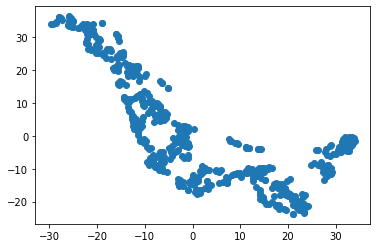

In [63]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA()
pca.fit(df_sub2)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[8.75717000e-01 1.24283000e-01 5.91107475e-23 3.91253180e-23
 3.11446500e-23 1.73218328e-23 1.09610468e-23 5.65515752e-24
 5.27655602e-24 4.90602050e-24 4.62721865e-24 3.88070979e-24
 3.64894579e-24 3.35271025e-24 3.15500989e-24 3.09952493e-24
 2.71530833e-24 2.49295884e-24 2.19164357e-24 1.92292244e-24
 1.69360470e-24 1.69360470e-24 1.69360034e-24 1.69326565e-24
 1.68735190e-24 1.64377037e-24 1.53622440e-24 1.48569439e-24
 1.46683686e-24 1.41133140e-24 1.40893655e-24 1.37089969e-24
 1.34726877e-24 1.29010917e-24 1.23255938e-24 1.13317801e-24
 1.12906980e-24 1.12906980e-24 1.12906980e-24 1.12906980e-24
 1.12879000e-24 1.12745265e-24 1.12565816e-24 1.12245786e-24
 1.10534832e-24 1.08588807e-24 1.02330586e-24 9.90572500e-25
 9.38425905e-25 8.46807895e-25 8.46802351e-25 8.46802351e-25
 8.46802351e-25 8.46802351e-25 8.46802351e-25 8.46802351e-25
 8.46802351e-25 8.46802351e-25 8.46802351e-25 8.46802351e-25
 8.46802351e-25 8.46802351e-25 8.46802351e-25 8.46802351e-25
 8.46802351e-25 8.468023

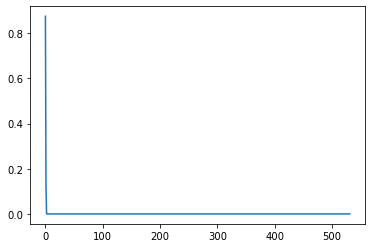

In [92]:
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

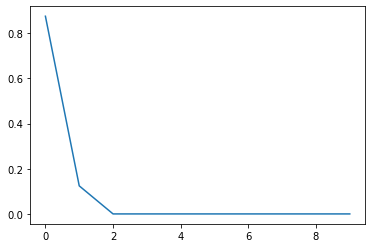

In [93]:
plt.plot(range(10), pca.explained_variance_ratio_[0:10])
plt.show()

In [94]:
np.sum(pca.explained_variance_ratio_[0:11])

1.0

In [95]:
pca = PCA(n_components=0.90)
pca.fit(df_sub3)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.31048273 0.07217244 0.05457387 0.04724893 0.03759883 0.02093228
 0.01323812 0.00681519 0.00636697 0.0059232  0.00559182 0.00468969
 0.00440979 0.00405179 0.00381285 0.00374582 0.00328147 0.00301278
 0.00264859 0.00232388 0.00204675 0.00204675 0.00204675 0.00204633
 0.00203819 0.00198769 0.00185643 0.00179547 0.00177269 0.00170562
 0.00170268 0.00165675 0.00162819 0.00155908 0.00148954 0.00136888
 0.0013645  0.0013645  0.0013645  0.0013645  0.0013645  0.00136348
 0.00135989 0.00135633 0.00133556 0.00131228 0.00123668 0.00119711
 0.0011341  0.00102338 0.00102338 0.00102338 0.00102338 0.00102338
 0.00102338 0.00102338 0.00102338 0.00102338 0.00102338 0.00102338
 0.00102338 0.00102338 0.00102338 0.00102338 0.00102338 0.00102338
 0.00102338 0.00102338 0.00102338 0.00102338 0.00102338 0.00102338
 0.00102338 0.00102338 0.00102338 0.00102338 0.00102338 0.00102338
 0.00102293 0.0010135  0.00101139 0.0010053  0.00099401 0.00098042
 0.00088761 0.00088036 0.00085838 0.00081537 0.00071578 0.0006

In [70]:
print(len(pca.explained_variance_ratio_))

385


In [71]:
df_pca = pca.transform(df_sub3)
df_pca = pd.DataFrame(df_pca, columns = ["PCA" + str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA376,PCA377,PCA378,PCA379,PCA380,PCA381,PCA382,PCA383,PCA384,PCA385
0,-0.209594,-0.805308,0.167689,-0.680029,-0.018546,-0.027856,0.001935,-0.017117,-0.050198,-0.024452,...,1.372086e-17,4.738697e-18,-2.861316e-19,2.355745e-18,-3.483815e-18,6.549233e-18,3.709877e-18,3.941442e-19,-7.258907e-18,-1.583098e-18
1,-0.187684,-0.807802,0.157192,-0.680608,-0.019215,-0.027712,0.002044,-0.018182,-0.050349,-0.024489,...,-4.126387e-02,-2.817069e-02,1.072805e-02,1.528219e-02,2.171081e-02,-7.657447e-03,6.596013e-03,-2.487888e-02,2.500711e-02,-7.816107e-03
2,3.533464,-0.309325,2.935301,0.388532,-0.201367,-0.266241,-0.289423,-0.151578,0.789138,0.382798,...,-5.209307e-02,-2.533664e-02,5.447796e-03,4.729852e-02,1.871940e-02,-2.600415e-02,1.434912e-02,-6.181471e-02,4.682991e-02,-4.894623e-02
3,-0.180448,0.697868,-0.166696,0.237319,-0.285568,-0.625639,0.639892,-0.017242,0.029196,0.010024,...,3.489532e-02,8.768364e-03,7.136057e-02,5.144470e-02,-2.936900e-02,-2.501958e-03,-6.900981e-02,9.041058e-02,6.734948e-03,-6.362438e-02
4,-0.173572,0.692087,-0.155612,0.129895,-0.216447,-0.106013,-0.249268,0.004752,0.119934,-0.133659,...,5.438221e-02,2.003495e-02,1.442324e-01,2.036448e-02,2.863358e-02,8.324251e-02,8.181928e-03,9.537044e-02,8.475082e-04,9.585279e-02


In [72]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

(532, 2)

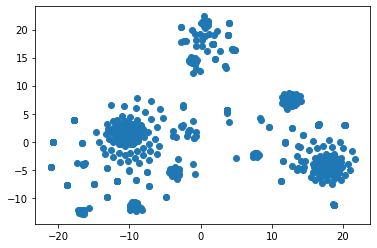

In [73]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [74]:
from sklearn.cluster import KMeans

C:\Users\drift\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


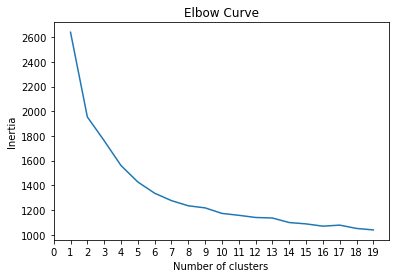

In [75]:
inertia = []
k = list(range(1, 20))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(list(range(20)))
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [76]:
model = KMeans(n_clusters=4, random_state=0)


model.fit(df_pca)


predictions = model.predict(df_pca)


df_pca["class"] = model.labels_
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA377,PCA378,PCA379,PCA380,PCA381,PCA382,PCA383,PCA384,PCA385,class
0,-0.209594,-0.805308,0.167689,-0.680029,-0.018546,-0.027856,0.001935,-0.017117,-0.050198,-0.024452,...,4.738697e-18,-2.861316e-19,2.355745e-18,-3.483815e-18,6.549233e-18,3.709877e-18,3.941442e-19,-7.258907e-18,-1.583098e-18,1
1,-0.187684,-0.807802,0.157192,-0.680608,-0.019215,-0.027712,0.002044,-0.018182,-0.050349,-0.024489,...,-2.817069e-02,1.072805e-02,1.528219e-02,2.171081e-02,-7.657447e-03,6.596013e-03,-2.487888e-02,2.500711e-02,-7.816107e-03,1
2,3.533464,-0.309325,2.935301,0.388532,-0.201367,-0.266241,-0.289423,-0.151578,0.789138,0.382798,...,-2.533664e-02,5.447796e-03,4.729852e-02,1.871940e-02,-2.600415e-02,1.434912e-02,-6.181471e-02,4.682991e-02,-4.894623e-02,2
3,-0.180448,0.697868,-0.166696,0.237319,-0.285568,-0.625639,0.639892,-0.017242,0.029196,0.010024,...,8.768364e-03,7.136057e-02,5.144470e-02,-2.936900e-02,-2.501958e-03,-6.900981e-02,9.041058e-02,6.734948e-03,-6.362438e-02,0
4,-0.173572,0.692087,-0.155612,0.129895,-0.216447,-0.106013,-0.249268,0.004752,0.119934,-0.133659,...,2.003495e-02,1.442324e-01,2.036448e-02,2.863358e-02,8.324251e-02,8.181928e-03,9.537044e-02,8.475082e-04,9.585279e-02,0


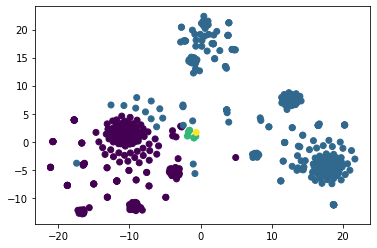

In [77]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=df_pca["class"])
plt.show()

In [78]:
df_pca["class"].value_counts()

1    293
0    231
2      7
3      1
Name: class, dtype: int64

In [79]:
df_sub.head()

,CryptID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
1,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
2,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.141590e+11
3,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,2.100000e+07
4,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00


In [80]:
classes = df_pca["class"]
df_pca["coin"] = coin_sub

In [81]:
preds = df_sub.copy()
preds["coin"] = coin_sub
preds["class"] = classes

coin_sub


0          42 Coin
1          404Coin
2        EliteCoin
3          Bitcoin
4         Ethereum
          ...     
527         ZEPHYR
528        Gapcoin
529         Beldex
530        Horizen
531    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [82]:
preds = df_sub.copy()
preds["coin"] = coin_sub
preds["class"] = classes

preds.head()

,CryptID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01,42 Coin,1
1,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08,404Coin,1
2,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.141590e+11,EliteCoin,2
3,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,2.100000e+07,Bitcoin,0
4,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00,Ethereum,0


In [83]:
preds.groupby("class").describe()

TotalCoinsMined                                                          \
                count          mean           std           min           25%   
class                                                                           
0               231.0  2.225018e+09  1.191016e+10  8.430000e+04  8.301985e+06   
1               293.0  2.616949e+09  1.012048e+10  4.199995e+01  8.305775e+06   
2                 7.0  8.148413e+10  6.986551e+10  8.800000e+01  3.528697e+10   
3                 1.0  9.899890e+11           NaN  9.899890e+11  9.899890e+11   

                                                TotalCoinSupply                \
                50%           75%           max           count          mean   
class                                                                           
0      2.335679e+07  1.348974e+08  1.430070e+11           231.0  3.937082e+09   
1      2.438772e+07  1.989381e+08  9.219282e+10           293.0  3.935501e+09   
2      5.313984e+10  1.313041e+11  1.840670e+11             7.0  3.501566e+11   
3      9.899890e+11  9.899890e+11  9.899890e+11             1.0  9.900000e+11   

                                                                             \
                std           min           25%           50%           75%   
class                                                                         
0      1.536696e+10  0.000000e+00  2.100000e+07  7.500000e+07  3.451412e+08   
1      1.465646e+10  0.000000e+00  1.970000e+07  7.400000e+07  4.000000e+08   
2      2.971525e+11  1.840000e+11  1.844685e+11  2.000000e+11  3.490795e+11   
3               NaN  9.900000e+11  9.900000e+11  9.900000e+11  9.900000e+11   

                     
                max  
class                
0      1.000000e+11  
1      9.900000e+10  
2      1.000000e+12  
3      9.900000e+11

In [84]:
preds.groupby("class").mean()

,IsTrading,TotalCoinsMined,TotalCoinSupply
class,,,
0,True,2.225018e+09,3.937082e+09
1,True,2.616949e+09,3.935501e+09
2,True,8.148413e+10,3.501566e+11
3,True,9.899890e+11,9.900000e+11


In [85]:
preds.groupby("class").count()

,CryptID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,coin
class,,,,,,,,
0,231,231,231,231,231,231,231,231
1,293,293,293,293,293,293,293,293
2,7,7,7,7,7,7,7,7
3,1,1,1,1,1,1,1,1


In [86]:
preds.loc[preds["class"] == 3]

,CryptID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
525,BTT,BitTorrent,TRC10,True,DPoS,9.899890e+11,9.900000e+11,BitTorrent,3


In [87]:
preds.loc[preds["class"] == 1]

,CryptID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01,42 Coin,1
1,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08,404Coin,1
6,DASH,Dash,X11,True,PoW/PoS,9.031294e+06,2.200000e+07,Dash,1
10,BTS,Bitshares,SHA-512,True,PoS,2.741570e+09,3.600571e+09,Bitshares,1
12,BTCD,BitcoinDark,SHA-256,True,PoW/PoS,1.288862e+06,2.200000e+07,BitcoinDark,1
...,...,...,...,...,...,...,...,...,...
524,PART,Particl,PoS,True,PoS,9.283138e+06,8.634140e+06,Particl,1
526,NXT,Nxt,PoS,True,PoS/LPoS,1.000000e+09,1.000000e+09,Nxt,1
527,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2.000000e+09,ZEPHYR,1
528,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,2.500000e+08,Gapcoin,1


In [88]:
preds.sort_values(by="TotalCoinsMined", ascending=False)

,CryptID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
525,BTT,BitTorrent,TRC10,True,DPoS,9.899890e+11,9.900000e+11,BitTorrent,3
98,BCN,ByteCoin,CryptoNight,True,PoW,1.840670e+11,1.844670e+11,ByteCoin,2
294,GCN,gCn Coin,Scrypt,True,PoW,1.630550e+11,2.000000e+11,gCn Coin,2
305,NYC,NewYorkCoin,Scrypt,True,PoW,1.430070e+11,0.000000e+00,NewYorkCoin,0
443,QWC,Qwertycoin,CryptoNight Heavy,True,PoW,9.955311e+10,1.844700e+11,Qwertycoin,2
...,...,...,...,...,...,...,...,...,...
415,PLTC,PlatinCoin,CryptoNight,True,PoW,8.430000e+04,6.000005e+08,PlatinCoin,0
29,BTB,BitBar,Scrypt,True,PoW/PoS,4.257948e+04,5.000000e+05,BitBar,1
77,SYNC,SyncCoin,X11,True,PoW/PoS,1.177000e+03,1.000000e+03,SyncCoin,1
21,MOON,MoonCoin,Scrypt,True,PoW,8.800000e+01,3.840000e+11,MoonCoin,2


In [89]:
preds.loc[preds.coin == "Nano"]

,CryptID,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
278,NANO,Nano,Blake2b,True,PoW,133248297.0,340282367.0,Nano,0
